##  Preprocessing steps

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("McDonald_s_Reviews.csv", encoding='latin1')


In [32]:
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [33]:
data = data.drop(['store_name', 'category'], axis=1)

In [34]:
def cleaned_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [35]:
data['review_cleaned'] = data['review'].apply(cleaned_text)

In [36]:
data.head()

,reviewer_id,store_address,latitude,longitude,rating_count,review_time,review,rating,review_cleaned
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,look like someone spit food normal transaction...
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,mcdonalds far food atmosphere go staff make di...
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,made mobile order got speaker checked line mov...
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,mc crispy chicken sandwich customer service qu...
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,repeat order time drive thru still manage mess...


<AxesSubplot:xlabel='rating', ylabel='count'>

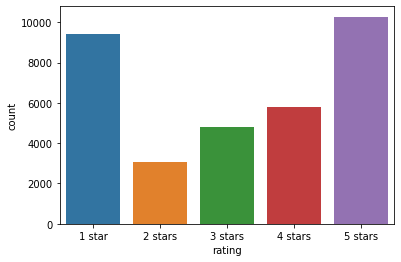

In [37]:
sns.countplot(data=data, x=data.rating, order=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])

In [38]:
data['rating'].value_counts()

5 stars    10274
1 star      9431
4 stars     5787
3 stars     4818
2 stars     3086
Name: rating, dtype: int64

In [39]:
def sentiment(rating):
    if rating in ['1 star', '2 stars']:
        return 'negative'
    elif rating == '3 stars':
        return 'neutral'
    else:
        return 'positive'

data['store_sentiment'] = data['rating'].apply(sentiment)

print(data.head())

   reviewer_id                                      store_address  latitude   \
0            1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1            2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2            3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3            4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
4            5  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   

   longitude rating_count   review_time  \
0 -97.792874        1,240  3 months ago   
1 -97.792874        1,240    5 days ago   
2 -97.792874        1,240    5 days ago   
3 -97.792874        1,240   a month ago   
4 -97.792874        1,240  2 months ago   

                                              review   rating  \
0  Why does it look like someone spit on my food?...   1 star   
1  It'd McDonalds. It is what it is as far as the...  4 stars   
2  Made a mobile order got to the speaker and che...   1 star   


In [40]:
data.head()

,reviewer_id,store_address,latitude,longitude,rating_count,review_time,review,rating,review_cleaned,store_sentiment
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,look like someone spit food normal transaction...,negative
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,mcdonalds far food atmosphere go staff make di...,positive
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,made mobile order got speaker checked line mov...,negative
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,mc crispy chicken sandwich customer service qu...,positive
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,repeat order time drive thru still manage mess...,negative


In [41]:
data['store_address'].value_counts()

9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
724 Broadway, New York, NY 10003, United States                               1140
429 7th Ave, New York, NY 10001, United States                                1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States    1030
1698

 ## Main functionality

In [42]:
data[data['store_address']=='1415 E State Rd, Fern Park, FL 32730, United States']['store_sentiment'].value_counts()

positive    973
negative    477
neutral     250
Name: store_sentiment, dtype: int64

/opt/anaconda3/envs/py38/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


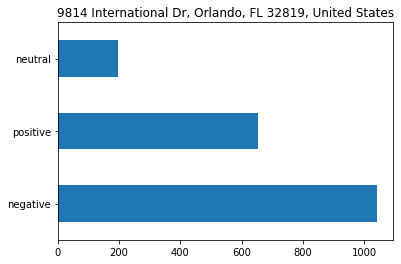

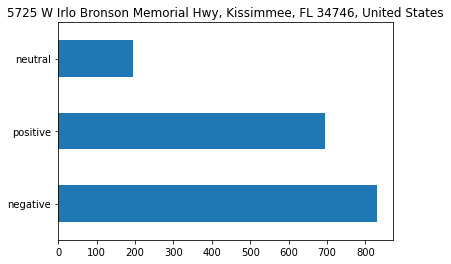

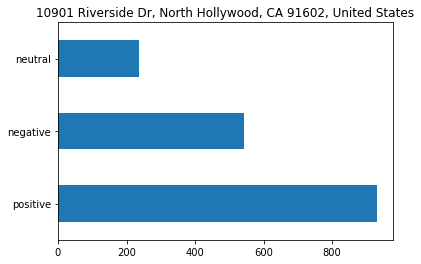

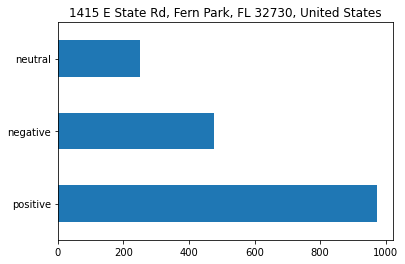

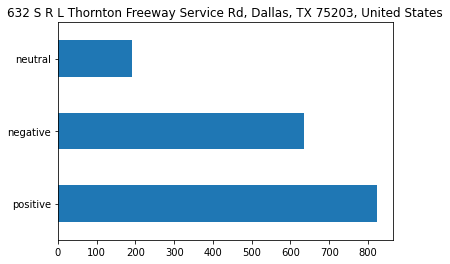

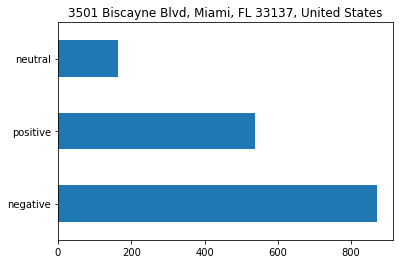

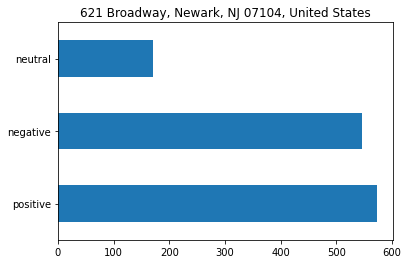

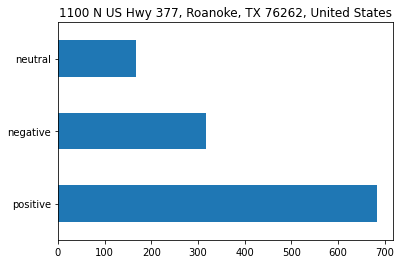

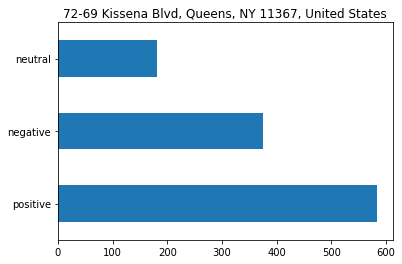

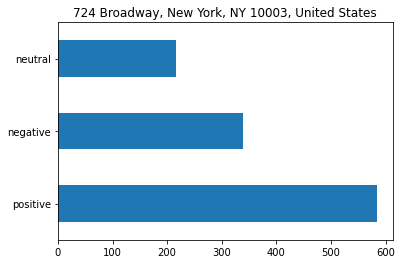

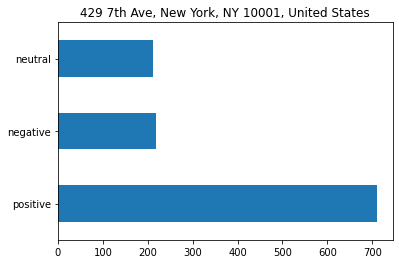

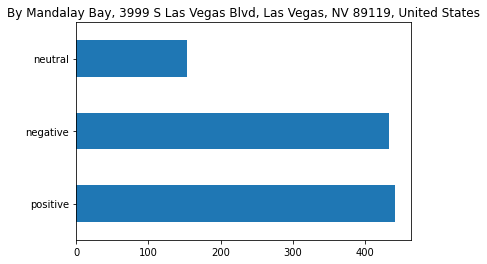

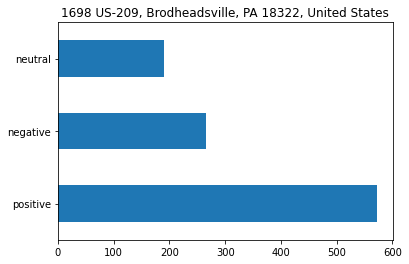

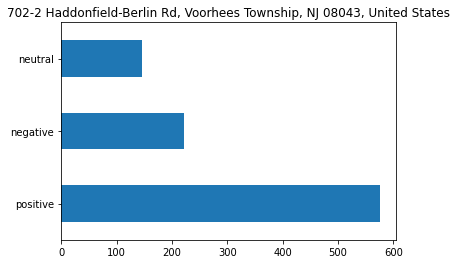

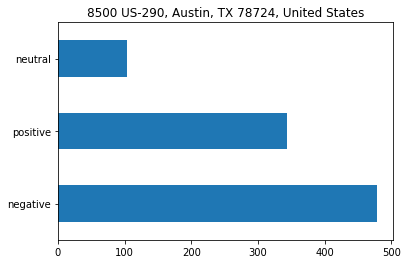

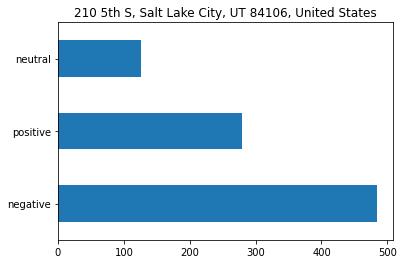

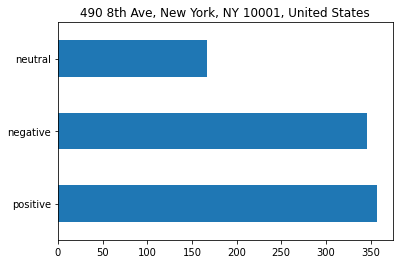

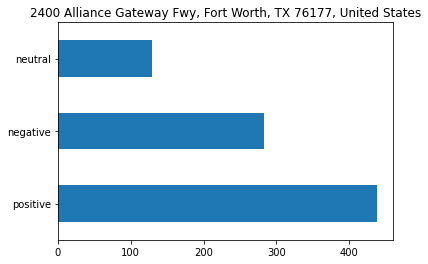

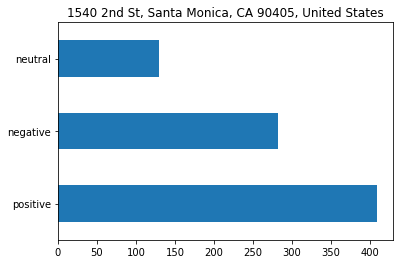

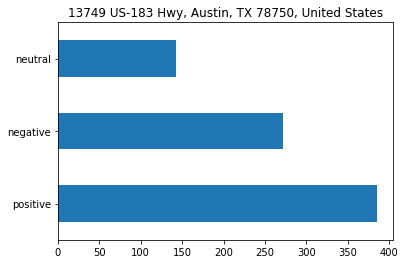

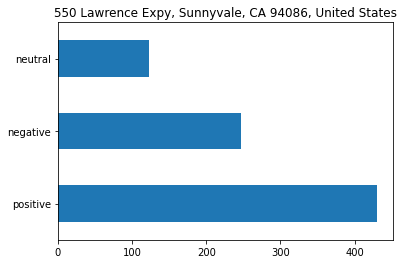

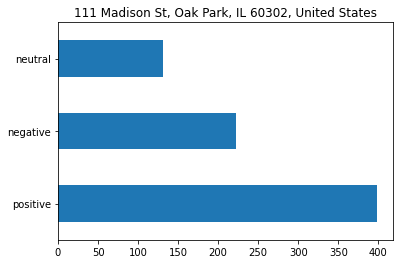

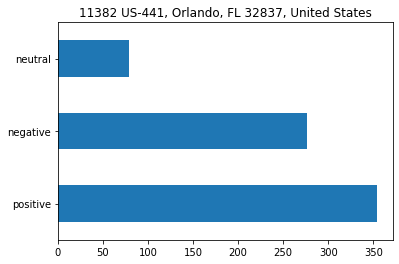

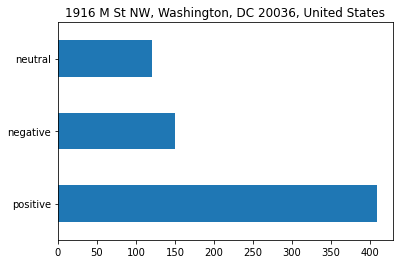

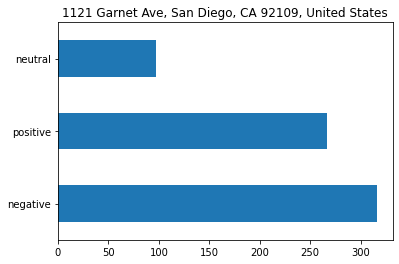

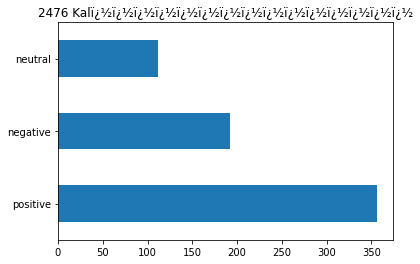

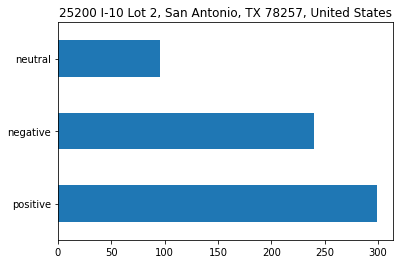

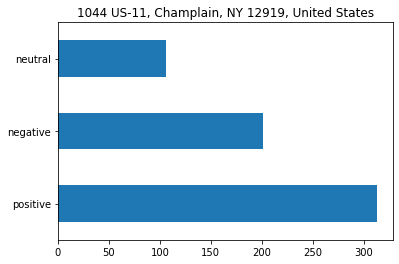

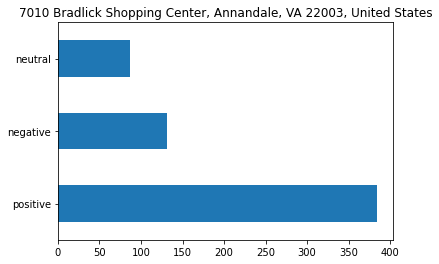

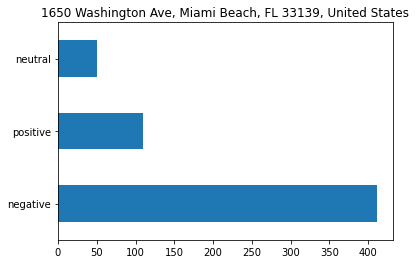

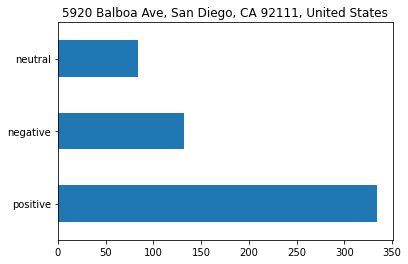

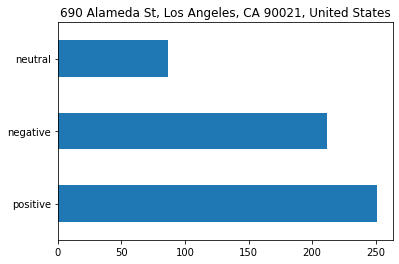

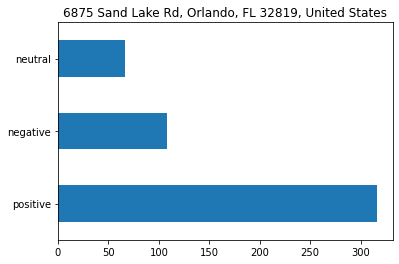

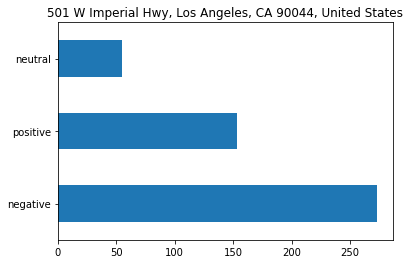

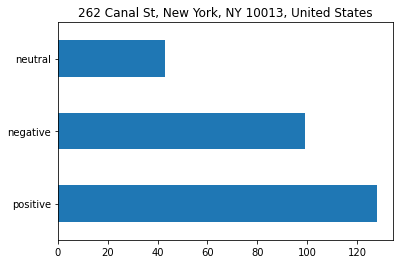

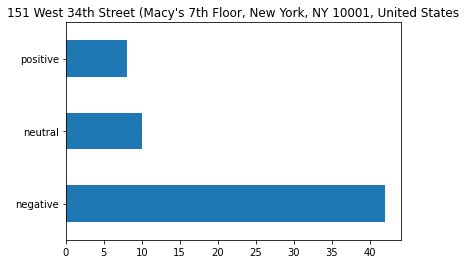

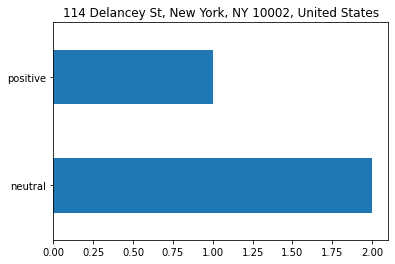

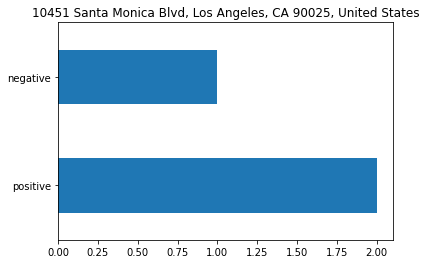

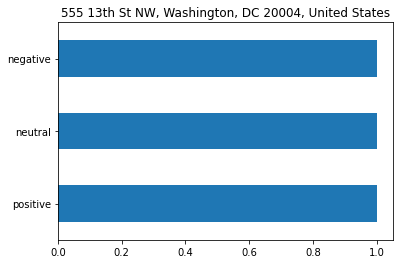

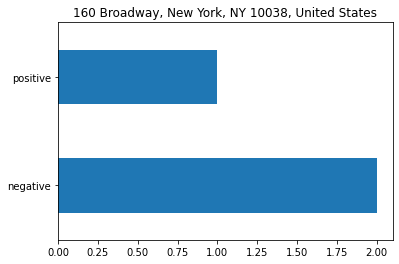

In [43]:
for address in data['store_address'].value_counts().index:
    plt.figure()
    
    data[data['store_address']==address]['store_sentiment'].value_counts().plot(kind='barh')
    plt.title(address)

In [44]:
data['state'] = data['store_address'].str.split(', ').str[-2].str.split().str[0]

In [45]:
data['state'].value_counts()

FL    8650
TX    6029
CA    5594
NY    5246
NJ    2233
NV    1030
PA    1028
UT     890
IL     751
DC     683
VA     602
Name: state, dtype: int64

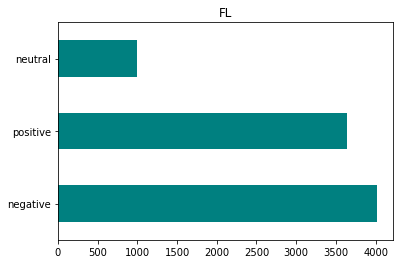

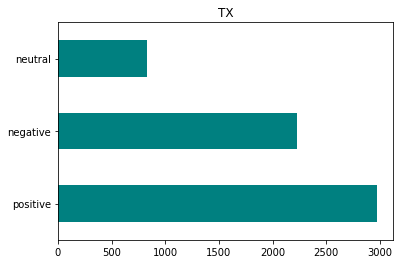

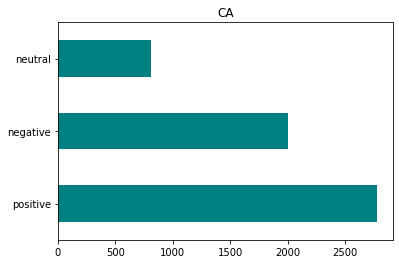

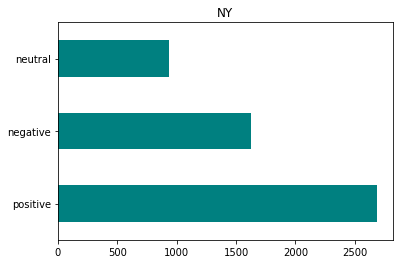

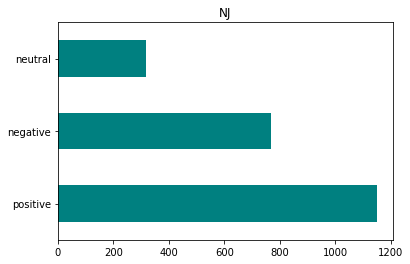

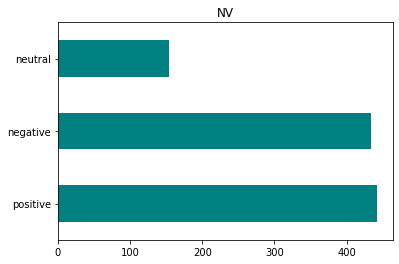

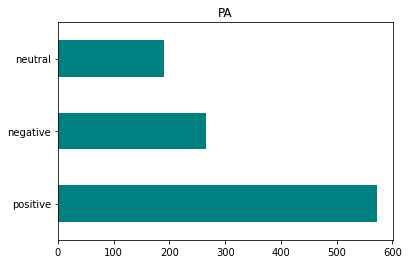

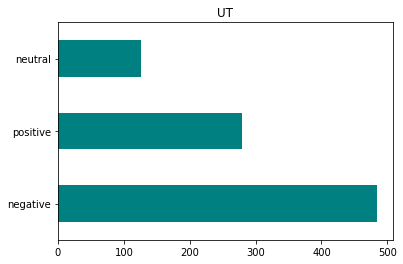

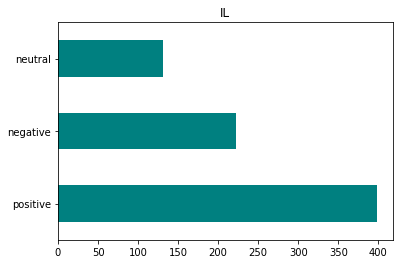

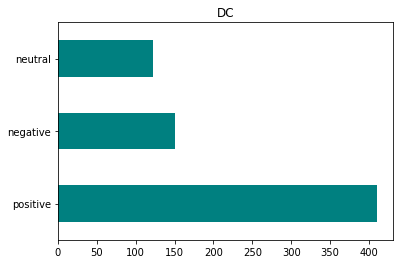

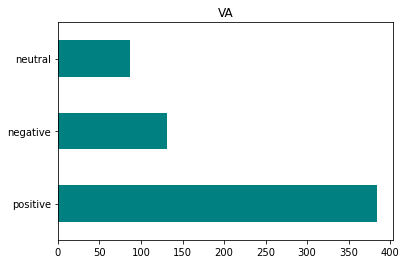

In [46]:
for address in data['state'].value_counts().index:
    plt.figure()
    
    data[data['state']==address]['store_sentiment'].value_counts().plot(kind='barh',color='teal')
    plt.title(address)